## Example of Creating Domains with River Walls

An alternative method to simulate walls (or levees) is to use `riverWalls`. Think of  `riverWalls` as infinitely thin walls. To set these up we need to build our mesh with  `breaklines` to define where the wall will occur and also how to apply them during the evolution by setting up a `riverWall` operator. 

First setup the mesh.

We setup a dictionary to contain the x,y,z information of each of the river walls in our simulation. In this case 3 river walls associated with wall1 to wall3. 

Look carefully at the mesh produced and notice the straight lines in the mesh at the location of the walls.

### Setup Notebook for Visualisation and Animation

We are using the format of a jupyter notebook. As such we need to setup inline matplotlib plotting and animation.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Allow inline jshtml animations
from matplotlib import rc
rc('animation', html='jshtml')

### Import ANUGA

We assume that anuga has been installed. If so we can import anuga. 

In [14]:
import anuga

### Create an ANUGA domain with create_domain_from_regions 

ANUGA is based on triangles and so the mesh can conform to interesting geometrical structures. In our example the steps define an interesting geometry. Let's conform our mesh to the steps.

We will use the construction function `anuga.create_domain_from_regions`. This function needs at least a polygon which defines the boundary of the region, and a tagging of the sections of the boundry polygon, which will allow us to specify specific boundary conditions associated with the tagged sections of the boundary.

We wil do this using the function `anuga.create_domain_from_regions`. In addition we aline the mesh with our `riverwalls` which will represent the position of our three walls. 

Figure files for each frame will be stored in _plot


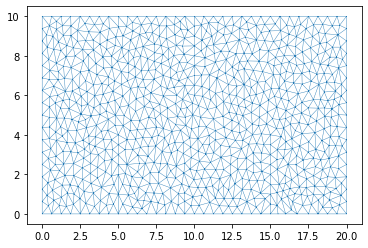

In [15]:
bounding_polygon = [[0.0, 0.0],
                    [20.0, 0.0],
                    [20.0, 10.0],
                    [0.0, 10.0]]

boundary_tags={'bottom': [0],
               'right': [1],
               'top': [2],
               'left': [3]
              }


riverWalls = { 'wall1': [[5.0,0.0,   0.5], [5.0,4.0,  0.5]],
               'wall2': [[15.0,0.0, -0.5], [15.0,4.0,-0.5]],
               'wall3': [[10.0,10.0, 0.0], [10.0,6.0, 0.0]]
             }

#bline = [[[0.1,5.0,0.0],[19.9,5.0,0.0]]]
              
domain3 = anuga.create_domain_from_regions(bounding_polygon, 
                                           boundary_tags,
                                           maximum_triangle_area = 0.2,
                                           breaklines = riverWalls.values())

domain3.set_name('domain3')
domain3.set_store_vertices_smoothly(False)

# Plot the resulting Mesh
dplotter3 = anuga.Domain_plotter(domain3)  
plt.triplot(dplotter3.triang, linewidth = 0.4);

Note: Look closely at the mesh and you will see three straight lines in the mesh generated by the breaklines. THis use of breakline can be very useful to build structures into the mesh (such as valley floors, buildings, and of course in this case riverwalls (or levees)).

### Initial and Boundary Conditions and River walls


In [16]:
#Initial Conditions
domain3.set_quantity('elevation', lambda x,y : -x/10, location='centroids') # Use function for elevation
domain3.set_quantity('friction', 0.01, location='centroids')                # Constant friction 
domain3.set_quantity('stage', expression='elevation', location='centroids') # Dry Bed 


# Boundary Conditions
Bi = anuga.Dirichlet_boundary([0.4, 0, 0])         # Inflow
Bo = anuga.Dirichlet_boundary([-2, 0, 0])          # Inflow
Br = anuga.Reflective_boundary(domain2)            # Solid reflective wall

domain3.set_boundary({'left': Bi, 'right': Bo, 'top': Br, 'bottom': Br})

# Setup RiverWall
domain3.riverwallData.create_riverwalls(riverWalls, verbose=False)

### Evolve

Notice that we have setup the river walls to be only 1 metre high. So we would expect some overtopping of the 2nd lower step. 

In [17]:
for t in domain3.evolve(yieldstep=2, duration=40):
  
    #dplotter.plot_depth_frame()
    dplotter3.save_depth_frame(vmin=0.0, vmax=1.0)
    
    domain3.print_timestepping_statistics()

    
# Read in the png files stored during the evolve loop
dplotter3.make_depth_animation() 

Time = 0.0000 (sec), steps=0 (5s)
Time = 2.0000 (sec), delta t in [0.01813369, 0.04322357] (s), steps=86 (0s)
Time = 4.0000 (sec), delta t in [0.01584979, 0.01883231] (s), steps=118 (0s)
Time = 6.0000 (sec), delta t in [0.01583185, 0.01738707] (s), steps=121 (0s)
Time = 8.0000 (sec), delta t in [0.01625105, 0.01686416] (s), steps=122 (0s)
Time = 10.0000 (sec), delta t in [0.01662976, 0.01887900] (s), steps=111 (0s)
Time = 12.0000 (sec), delta t in [0.01762579, 0.01855303] (s), steps=112 (0s)
Time = 14.0000 (sec), delta t in [0.01705865, 0.01766205] (s), steps=116 (0s)
Time = 16.0000 (sec), delta t in [0.01673190, 0.01716414] (s), steps=118 (0s)
Time = 18.0000 (sec), delta t in [0.01581448, 0.01672762] (s), steps=124 (0s)
Time = 20.0000 (sec), delta t in [0.01558134, 0.01581339] (s), steps=128 (0s)
Time = 22.0000 (sec), delta t in [0.01517773, 0.01559634] (s), steps=131 (0s)
Time = 24.0000 (sec), delta t in [0.01509483, 0.01517755] (s), steps=133 (0s)
Time = 26.0000 (sec), delta t in [0